## Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

%matplotlib inline
sns.set(style = "darkgrid")
import math
import datetime as dt
import calendar
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
# import the sqlite package where we will connect and store the datasets
from sqlalchemy import create_engine
import sqlite3

In [2]:
# Load data to pandas dataframe
old_df = pd.read_csv("Customer_RFM.csv")

In [3]:
path = "C:/Users/USER/Documents/Udacity/Sprocket/sprocket.db"

In [4]:
# Fetch all the tables in the database
conn = sqlite3.connect(path)
cur = conn.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';")
tables = cur.fetchall()
print(tables)
conn.close()

[('tblTitle Sheet',), ('tblTransactions',), ('tblNewCustomerList',), ('tblCustomerDemographic',), ('tblCustomerAddress',)]


In [5]:
# Extract the new customer table in the database
conn = sqlite3.connect(path)
query = "SELECT * FROM 'tblNewCustomerList'"
new_df = pd.read_sql_query(query, conn)
conn.close()

In [6]:
new_df.head(1)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value


In [7]:
# rename the first observation, columns
new_df.columns = new_df.iloc[0]
# Drop the duplicate column names on index 0
new_df.drop(index = 0, inplace = True)
new_df.reset_index(drop = True, inplace = True)

In [8]:
new_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.703125


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   object 
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   object 
 11  address                        

In [10]:
# Display features with missing values and %
missingTransum = new_df.isnull().sum()
missingTranspercent = round(missingTransum/len(new_df) * 100, 1)
missingTrans = pd.concat([missingTransum, missingTranspercent], axis = 1)
missingTrans.columns = ["missing_counts", "missing_percent"]
missingTrans

,missing_counts,missing_percent
0,,
first_name,0,0.0
last_name,29,2.9
gender,0,0.0
past_3_years_bike_related_purchases,0,0.0
DOB,17,1.7
job_title,106,10.6
job_industry_category,165,16.5
wealth_segment,0,0.0
deceased_indicator,0,0.0


In [11]:
# Fill the job_industry_category, and job_title missing values with the mode of the feature
lists = ["job_industry_category", "job_title"]
for mod in lists:
    new_df[mod] = new_df[mod].fillna(new_df[mod].mode()[0])

In [12]:
# Drop the nan values in the DOB features
new_df.dropna(subset = "DOB", inplace = True)

In [13]:
new_df["DOB"] = pd.to_datetime(new_df["DOB"])
# Check for inaccuracy in the DOB column
new_df.sort_values(by = "DOB").head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
797,Anthony,Morison,Male,7,1938-06-08,General Manager,Health,Mass Customer,N,No,...,NSW,Australia,9,1.03,1.03,1.2875,1.094375,797.0,797,0.6
885,Zachariah,Meininking,Male,40,1938-06-09,Cost Accountant,Financial Services,Affluent Customer,N,Yes,...,NSW,Australia,7,0.56,0.70,0.7000,0.700000,883.0,883,0.53125


In [14]:
# Convert DOB to age using a function
def to_age(birth):
    today = dt.date.today()
    age = today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day))
    return age
# Applying the function to the DOB column
new_df["age"] = new_df["DOB"].apply(lambda x: to_age(x))
# Drop DOB
new_df.drop("DOB", axis = 1, inplace = True)

In [15]:
# Drop nan header columns from dataset
new_df.columns = new_df.columns.fillna("drop")
new_df.drop("drop", axis = 1, inplace = True)
new_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age'],
      dtype='object', name=0)

In [16]:
integer = ["tenure", "property_valuation", "past_3_years_bike_related_purchases"]
for ints in integer:
    new_df[ints] = new_df[ints].astype("int")

In [17]:
new_df.dtypes

0
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases     int32
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
owns_car                               object
tenure                                  int32
address                                object
postcode                               object
state                                  object
country                                object
property_valuation                      int32
Rank                                   object
Value                                  object
age                                     int64
dtype: object

In [18]:
new_df.duplicated().sum()

0

In [19]:
new_df.nunique()

0
first_name                             925
last_name                              944
gender                                   2
past_3_years_bike_related_purchases    100
job_title                              184
job_industry_category                    9
wealth_segment                           3
deceased_indicator                       1
owns_car                                 2
tenure                                  22
address                                983
postcode                               515
state                                    3
country                                  1
property_valuation                      12
Rank                                   324
Value                                  319
age                                     65
dtype: int64

In [20]:
# Define a function for listing categorical variables so we check for consistency
def category(df):
    cat_list = []
    for x in df.columns:
        if df[x].dtypes == "object":
            cat_list.append(x)
    return cat_list

In [21]:
# Print unique values for categorical variables
cat_list = category(new_df)
for col in cat_list:
    print(col)
    print(new_df[col].unique())
    print("")
    print("_"*100)
    print("")

first_name
['Chickie' 'Morly' 'Ardelis' 'Lucine' 'Melinda' 'Druci' 'Rutledge'
 'Nancie' 'Duff' 'Barthel' 'Rockwell' 'Wheeler' 'Olag' 'Melba' 'Mandie'
 'Dukie' 'Marcelia' 'Winnifred' 'Odilia' 'Karly' 'Teddie' 'Gaston' 'Otis'
 'Tabbatha' 'Brena' 'Rourke' 'Dyane' 'Claudine' 'Blinnie' 'Rhona'
 'Sharron' 'Brien' 'Sybilla' 'Mikel' 'Maisie' 'Arleen' 'Farlie' 'Mitchell'
 'Garik' 'Antonin' 'Vinny' 'Colene' 'Neile' 'Corinna' 'Brooke' 'Gipsy'
 'Sheena' 'Jobina' 'Gale' 'Thaxter' 'Heinrick' 'Taylor' 'Griswold'
 'Odessa' 'Lavena' 'Martelle' 'Briant' 'Marylou' 'Whittaker' 'Lorrie'
 'Jedediah' 'Kaine' 'Loise' 'Cristen' 'Dorothy' 'Rosmunda' 'Rozamond'
 'Gunner' 'Vivienne' 'Sherilyn' 'Bessie' 'Kevina' 'Yancy' 'Mabelle'
 'Hasheem' 'Tobias' 'Glennis' 'Chanda' 'Katheryn' 'Sumner' 'Valerie'
 'Esther' 'Gardie' 'Sean' 'Pietra' 'Marysa' 'Kahaleel' 'Ossie' 'Sid'
 'Ludovico' 'Patricia' 'Andromache' 'Levy' 'Nobe' 'Jehu' 'Symon' 'Karlik'
 'Bengt' 'Evangelin' 'Hanny' 'Gina' 'Reynold' 'Flossy' 'Griffith' 'Jamie'
 'L

In [22]:
# Correct inaccuracy in the spelling of Agriculture
new_df["job_industry_category"] = new_df["job_industry_category"].replace("Argiculture", "Agriculture")

In [23]:
new_df.shape

(983, 18)

In [24]:
old_df.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,tenure_bin,recency,frequency,monetary,r_Q,f_Q,m_Q,rfm_class,total_score,segment
0,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,...,9-13,77,3,1953.15,2,1,1,211,4,bronze
1,2950,2017-10-16,0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,...,9-13,77,3,1953.15,2,1,1,211,4,bronze
2,2950,2017-04-26,0,Approved,Solex,Standard,medium,medium,478.16,298.72,...,9-13,77,3,1953.15,2,1,1,211,4,bronze
3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,...,9-13,22,7,7351.70,3,3,3,333,9,silver
4,3120,2017-10-05,0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,...,9-13,22,7,7351.70,3,3,3,333,9,silver


In [25]:
old_df.shape

(19152, 39)

In [26]:
all_columns = pd.Series(list(old_df) + list(new_df))
all_columns[all_columns.duplicated()].unique()

array(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'address', 'postcode', 'state', 'property_valuation', 'age'],
      dtype=object)

In [27]:
# Create a new dataframe with some part of the training features
old_train = old_df[['gender', 'past_3_years_bike_related_purchases', 'job_industry_category', 
                    'wealth_segment', 'owns_car', 'tenure', 'state', 'property_valuation', 'age']]
target = old_df["segment"]
# Create a new dataframe with from the new customer dataframe
new_cust = new_df[['gender', 'past_3_years_bike_related_purchases', 'job_industry_category', 
                    'wealth_segment', 'owns_car', 'tenure', 'state', 'property_valuation', 'age']]

In [28]:
old_train.shape, new_cust.shape, target.shape

((19152, 9), (983, 9), (19152,))

In [29]:
old_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   gender                               19152 non-null  object
 1   past_3_years_bike_related_purchases  19152 non-null  int64 
 2   job_industry_category                19152 non-null  object
 3   wealth_segment                       19152 non-null  object
 4   owns_car                             19152 non-null  object
 5   tenure                               19152 non-null  int64 
 6   state                                19152 non-null  object
 7   property_valuation                   19152 non-null  int64 
 8   age                                  19152 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 972.6+ KB


In [30]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   gender                               983 non-null    object
 1   past_3_years_bike_related_purchases  983 non-null    int32 
 2   job_industry_category                983 non-null    object
 3   wealth_segment                       983 non-null    object
 4   owns_car                             983 non-null    object
 5   tenure                               983 non-null    int32 
 6   state                                983 non-null    object
 7   property_valuation                   983 non-null    int32 
 8   age                                  983 non-null    int64 
dtypes: int32(3), int64(1), object(5)
memory usage: 46.1+ KB


In [31]:
new_cust.isnull().sum()

0
gender                                 0
past_3_years_bike_related_purchases    0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
state                                  0
property_valuation                     0
age                                    0
dtype: int64

In [32]:
# Perform one hot encoding on the old nominal features
old_features = ['gender', 'job_industry_category', 'owns_car', 'state']
for feature in old_features:
    dummies = pd.get_dummies(old_train[feature])
    old_train = pd.concat([old_train, dummies], axis=1)
    old_train.drop(feature, axis=1, inplace=True)

# Perform one hot encoding on the new nominal features
new_features = ['gender', 'job_industry_category', 'owns_car', 'state']
for feature in new_features:
    dummies = pd.get_dummies(new_cust[feature])
    new_cust = pd.concat([new_cust, dummies], axis=1)
    new_cust.drop(feature, axis=1, inplace=True)

In [33]:
# Convert ordinal features into numerical column using label encoder
from sklearn.preprocessing import LabelEncoder
LE_O = LabelEncoder()
old_train["wealth_segment"] = LE_O.fit_transform(old_train["wealth_segment"])
# Convert ordinal features into numerical column using label encoder
LE_N = LabelEncoder()
new_cust["wealth_segment"] = LE_N.fit_transform(new_cust["wealth_segment"])

In [34]:
old_train.shape, new_cust.shape

((19152, 21), (983, 21))

In [35]:
all_columns = pd.Series(list(old_train) + list(new_cust))
all_columns[all_columns.duplicated()].unique()

array(['past_3_years_bike_related_purchases', 'wealth_segment', 'tenure',
       'property_valuation', 'age', 'Female', 'Male', 'Agriculture',
       'Entertainment', 'Financial Services', 'Health', 'IT',
       'Manufacturing', 'Property', 'Retail', 'Telecommunications', 'No',
       'Yes', 'NSW', 'QLD', 'VIC'], dtype=object)

In [36]:
old_train.head()

,past_3_years_bike_related_purchases,wealth_segment,tenure,property_valuation,age,Female,Male,Agriculture,Entertainment,Financial Services,...,IT,Manufacturing,Property,Retail,Telecommunications,No,Yes,NSW,QLD,VIC
0,19,2,10,6,68,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
1,19,2,10,6,68,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,19,2,10,6,68,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,89,2,10,5,44,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,89,2,10,5,44,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [37]:
new_cust.head()

,past_3_years_bike_related_purchases,wealth_segment,tenure,property_valuation,age,Female,Male,Agriculture,Entertainment,Financial Services,...,IT,Manufacturing,Property,Retail,Telecommunications,No,Yes,NSW,QLD,VIC
0,86,2,14,6,66,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,69,2,16,11,53,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,10,0,10,5,49,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,64,0,5,1,44,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,34,0,19,9,58,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [38]:
old_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19152 entries, 0 to 19151
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   past_3_years_bike_related_purchases  19152 non-null  int64
 1   wealth_segment                       19152 non-null  int32
 2   tenure                               19152 non-null  int64
 3   property_valuation                   19152 non-null  int64
 4   age                                  19152 non-null  int64
 5   Female                               19152 non-null  uint8
 6   Male                                 19152 non-null  uint8
 7   Agriculture                          19152 non-null  uint8
 8   Entertainment                        19152 non-null  uint8
 9   Financial Services                   19152 non-null  uint8
 10  Health                               19152 non-null  uint8
 11  IT                                   19152 non-null  u

In [39]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   past_3_years_bike_related_purchases  983 non-null    int32
 1   wealth_segment                       983 non-null    int32
 2   tenure                               983 non-null    int32
 3   property_valuation                   983 non-null    int32
 4   age                                  983 non-null    int64
 5   Female                               983 non-null    uint8
 6   Male                                 983 non-null    uint8
 7   Agriculture                          983 non-null    uint8
 8   Entertainment                        983 non-null    uint8
 9   Financial Services                   983 non-null    uint8
 10  Health                               983 non-null    uint8
 11  IT                                   983 non-null    uint8

## MODEL BUILDING

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(old_train, target, test_size = 0.2, random_state = 7)

In [41]:
# Print the shape of the X_train and Y_train datasets and ensure that the numbers match
print("X_train is: ", X_train.shape); print("\nY_train is: ", Y_train.shape)

X_train is:  (15321, 21)

Y_train is:  (15321,)


In [42]:
# Print the shape of the X_test and Y_test datasets and ensure that the numbers match
print("X_test is: ", X_test.shape); print("\nY_test is: ", Y_test.shape)

X_test is:  (3831, 21)

Y_test is:  (3831,)


#### DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier
seg_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 7)
seg_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=7)

In [44]:
pred_tree = seg_tree.predict(X_test)
print(pred_tree[0:5])
print(Y_test[0:5])

['basic' 'silver' 'platinum' 'silver' 'gold']
4569        basic
12420      silver
5202     platinum
17465      silver
15152        gold
Name: segment, dtype: object


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [46]:
def plot_confusion_matrix(confmx, classes, normalize = False, title = "Confusion Matrix", cmap = plt.cm.Blues):
    """This function prints and plots the confusion matrix...
       Normalization can be applied by setting 'normalize = True' 
    """
    if normalize:
        cm = confmx.astype("float")/confmx.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion Matrix without Normalization")
        print(confmx, "\n")
        plt.imshow(confmx, interpolation = "nearest", cmap = cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation = 45)
        plt.yticks(tick_marks, classes)
        fmt = ".2f" if normalize else "d"
        thresh = confmx.max()/2
        for i, j in itertools.product(range(confmx.shape[0]), range(confmx.shape[1])):
            plt.text(j, i, format(confmx[i, j], fmt), horizontalalignment = "center", color = "white" if confmx[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
        plt.show()

In [47]:
# Create a classification report
class_rep_tree = classification_report(Y_test, pred_tree)
print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
               precision    recall  f1-score   support

       basic       1.00      0.99      0.99       744
      bronze       1.00      0.99      0.99       999
        gold       0.99      1.00      1.00       710
    platinum       1.00      1.00      1.00       362
      silver       0.99      1.00      1.00      1016

    accuracy                           0.99      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       0.99      0.99      0.99      3831



In [48]:
# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, pred_tree, labels = ["platinum", "gold", "silver", "bronze", "basic"])
np.set_printoptions(precision = 2)

Confusion Matrix without Normalization
[[ 362    0    0    0    0]
 [   0  710    0    0    0]
 [   0    2 1014    0    0]
 [   0    0    7  991    1]
 [   0    5    1    4  734]] 



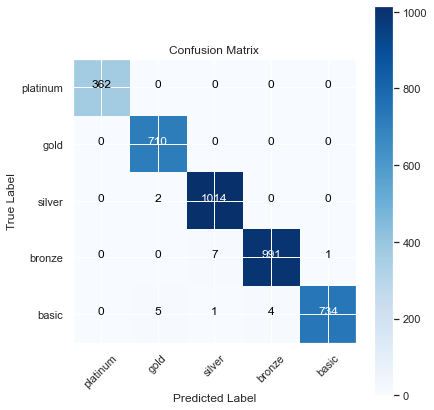

In [49]:
# Plot non normalized confusion matrix
plt.figure(figsize = [6, 6])
plot_confusion_matrix(conf_matrix, classes = ["platinum", "gold", "silver", "bronze", "basic"])

#### RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, random_state = 7)
forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=7)

In [51]:
pred_forest = forest.predict(X_test)
print(pred_forest[0:5])
print(Y_test[0:5])

['basic' 'silver' 'platinum' 'silver' 'gold']
4569        basic
12420      silver
5202     platinum
17465      silver
15152        gold
Name: segment, dtype: object


In [52]:
# Create a classification report
class_rep_forest = classification_report(Y_test, pred_forest)
print("Random Forest: \n", class_rep_forest)

Random Forest: 
               precision    recall  f1-score   support

       basic       1.00      0.98      0.99       744
      bronze       0.99      0.99      0.99       999
        gold       0.99      1.00      0.99       710
    platinum       1.00      1.00      1.00       362
      silver       1.00      1.00      1.00      1016

    accuracy                           0.99      3831
   macro avg       1.00      0.99      0.99      3831
weighted avg       0.99      0.99      0.99      3831



In [53]:
# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, pred_forest, labels = ["platinum", "gold", "silver", "bronze", "basic"])
np.set_printoptions(precision = 2)

Confusion Matrix without Normalization
[[ 362    0    0    0    0]
 [   0  710    0    0    0]
 [   0    2 1014    0    0]
 [   0    1    4  993    1]
 [   0    6    1    6  731]] 



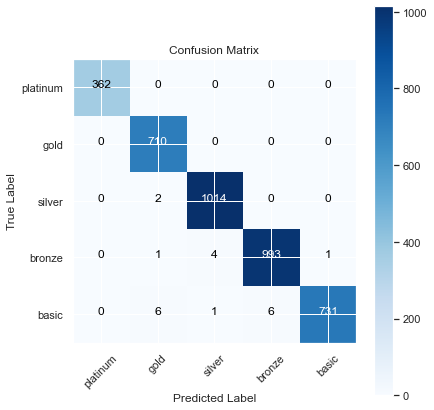

In [54]:
# Plot non normalized confusion matrix
plt.figure(figsize = [6, 6])
plot_confusion_matrix(conf_matrix, classes = ["platinum", "gold", "silver", "bronze", "basic"])

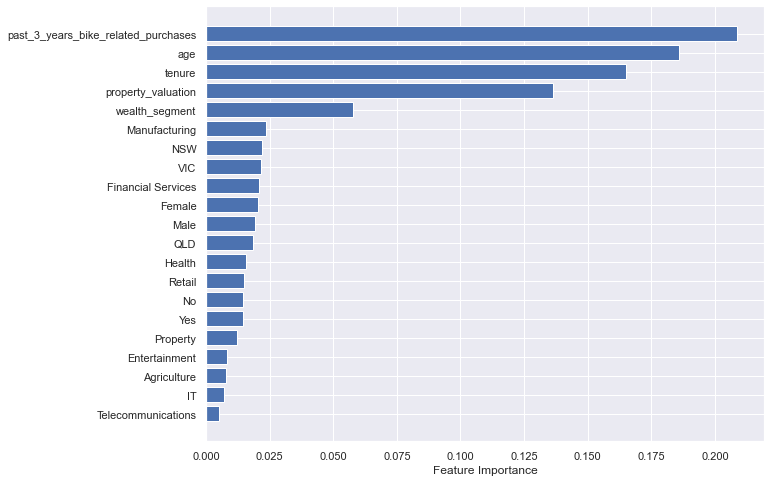

In [55]:
# Lets visualize the feature importance of our Random Forest model
plt.figure(figsize = [10, 8])
feature_names = X_train.columns
feature_imp = forest.feature_importances_
sorted_ind = feature_imp.argsort()
plt.barh(range(len(feature_names)), feature_imp[sorted_ind], align = "center")
plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_ind])
plt.xlabel("Feature Importance")
plt.show()

From our results, both the decision tree and random forest did a perfect job. We will use the random forest to predict new segments on the new dataset as it performs better

## OLD CUSTOMERS TO TARGET

In [56]:
old_target = old_df[old_df['segment'] == 'platinum']

In [57]:
oldpred = old_target.groupby('customer_id').agg({'first_name': lambda x: x.value_counts().index[0],
                               'last_name': lambda x: x.value_counts().index[0],
                               'gender': lambda x: x.value_counts().index[0],
                               'job_title': lambda x: x.value_counts().index[0],
                               'job_industry_category': lambda x: x.value_counts().index[0], 
                               'wealth_segment': lambda x: x.value_counts().index[0],
                               'age': lambda x: x.value_counts().index[0],
                               'address': lambda x: x.value_counts().index[0],
                               'postcode': lambda x: x.value_counts().index[0],
                               'state': lambda x: x.value_counts().index[0],
                               'monetary': lambda x: x.value_counts().index[0],
                               'segment': lambda x: x.value_counts().index[0]
                              }).sort_values(by = ['monetary'], ascending = False).reset_index().drop(['customer_id', 'monetary'], axis = 1)
oldpred

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,age,address,postcode,state,segment
0,Jillie,Fyndon,Female,Programmer Analyst IV,Manufacturing,Mass Customer,51,8142 Tomscot Drive,4132,QLD,platinum
1,Deana,Rathbourne,Female,Executive Secretary,Manufacturing,Mass Customer,37,8587 Graceland Way,2206,NSW,platinum
2,Ammamaria,Standbridge,Female,Analog Circuit Design manager,Health,Affluent Customer,50,8044 Emmet Hill,3150,VIC,platinum
3,Barrett,Lindley,Male,General Manager,Retail,Mass Customer,50,58563 Monterey Hill,4300,QLD,platinum
4,De,Denington,Female,Research Associate,Financial Services,Mass Customer,46,5 Schurz Place,4350,QLD,platinum
...,...,...,...,...,...,...,...,...,...,...,...
195,Lorain,Eddisforth,Female,Office Assistant III,Property,High Net Worth,55,399 Butterfield Crossing,4115,QLD,platinum
196,Jermayne,Hryniewicki,Male,Business Systems Development Analyst,Manufacturing,Mass Customer,46,592 Merry Lane,3184,VIC,platinum
197,Reine,Semken,Female,Account Coordinator,Agriculture,High Net Worth,46,84019 Porter Trail,2871,NSW,platinum
198,Jim,Shoppee,Male,Clinical Specialist,Health,Affluent Customer,46,0 Gateway Road,3149,VIC,platinum


In [66]:
old_target.transaction_month

62         August
63        January
64       November
65          March
66       December
           ...   
17957     January
17958     October
17959      August
17960    December
17961       April
Name: transaction_month, Length: 1877, dtype: object

## RECOMMENDATION FOR NEW DATASET

In [58]:
labels = forest.predict(new_cust)
new_df["predicted_segment"] = labels.tolist()
predicted_customer =  new_df[["first_name", "last_name", "gender", "wealth_segment", "address", "postcode", "state", "age", "predicted_segment"]]
predicted_customer

,first_name,last_name,gender,wealth_segment,address,postcode,state,age,predicted_segment
0,Chickie,Brister,Male,Mass Customer,45 Shopko Center,4500,QLD,66,platinum
1,Morly,Genery,Male,Mass Customer,14 Mccormick Park,2113,NSW,53,bronze
2,Ardelis,Forrester,Female,Affluent Customer,5 Colorado Crossing,3505,VIC,49,basic
3,Lucine,Stutt,Female,Affluent Customer,207 Annamark Plaza,4814,QLD,44,bronze
4,Melinda,Hadlee,Female,Affluent Customer,115 Montana Place,2093,NSW,58,bronze
...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,Affluent Customer,2 Sloan Way,2200,NSW,64,bronze
996,Burk,Wortley,Male,Mass Customer,04 Union Crossing,2196,NSW,22,bronze
997,Melloney,Temby,Female,Affluent Customer,33475 Fair Oaks Junction,4702,QLD,69,gold
998,Dickie,Cubbini,Male,Mass Customer,57666 Victoria Way,4215,QLD,70,bronze


In [59]:
# View customers that are predicted as platinum
predicted_customer[predicted_customer["predicted_segment"] == "platinum"]

,first_name,last_name,gender,wealth_segment,address,postcode,state,age,predicted_segment
0,Chickie,Brister,Male,Mass Customer,45 Shopko Center,4500,QLD,66,platinum
19,Karly,Willavize,Female,High Net Worth,193 North Point,2190,NSW,69,platinum
25,Rourke,Gillbard,Male,Mass Customer,75 Cordelia Trail,4817,QLD,78,platinum
132,Sharline,Abyss,Female,Mass Customer,367 Bay Point,4011,QLD,63,platinum
144,Glenn,Casbourne,Female,Mass Customer,2 Morrow Alley,4207,QLD,42,platinum
263,Zondra,Ringham,Female,Mass Customer,416 Lighthouse Bay Lane,4510,QLD,75,platinum
340,Nicole,Ruckhard,Female,Affluent Customer,23694 Leroy Place,4560,QLD,54,platinum
493,Elianora,Poolton,Female,Mass Customer,5 Macpherson Drive,3134,VIC,79,platinum
514,Emelia,Ackwood,Female,Mass Customer,1 South Street,4183,QLD,35,platinum
534,Jacobo,Mucklow,Male,High Net Worth,5512 Ronald Regan Hill,3122,VIC,70,platinum


In [60]:
# View customers that are predicted as gold
predicted_customer[predicted_customer["predicted_segment"] == "gold"]

,first_name,last_name,gender,wealth_segment,address,postcode,state,age,predicted_segment
6,Rutledge,Hallt,Male,Mass Customer,7 Nevada Crossing,2620,NSW,47,gold
26,Dyane,Burwell,Female,Mass Customer,51 Hooker Court,2640,NSW,71,gold
29,Rhona,De Freyne,Female,High Net Worth,11184 East Drive,3056,VIC,62,gold
31,Brien,Heaton,Male,Mass Customer,8 Novick Trail,2470,NSW,71,gold
32,Sybilla,MacCart,Female,Mass Customer,74 Welch Pass,2620,NSW,36,gold
...,...,...,...,...,...,...,...,...,...
980,Tyne,Anshell,Female,Mass Customer,93 Sutherland Terrace,2560,NSW,31,gold
986,Consalve,Ballay,Male,Mass Customer,72 Village Terrace,2250,NSW,64,gold
988,Vyky,Pegg,Female,Mass Customer,31854 Anniversary Terrace,2322,NSW,80,gold
989,Kellen,Pawelski,Female,High Net Worth,125 Manufacturers Parkway,2193,NSW,78,gold


In [61]:
# View customers that are predicted as silver
predicted_customer[predicted_customer["predicted_segment"] == "silver"]

,first_name,last_name,gender,wealth_segment,address,postcode,state,age,predicted_segment
5,Druci,Brandli,Female,High Net Worth,89105 Pearson Terrace,4075,QLD,72,silver
10,Rockwell,Matson,Male,High Net Worth,3682 Crowley Point,4573,QLD,28,silver
14,Mandie,Feares,Female,Mass Customer,39 Kedzie Pass,4053,QLD,59,silver
16,Marcelia,Monkleigh,Female,Mass Customer,610 Swallow Street,4051,QLD,30,silver
21,Gaston,Dallaghan,Male,Mass Customer,656 Fuller Street,2783,NSW,30,silver
...,...,...,...,...,...,...,...,...,...
964,Jammie,Seldner,Female,Mass Customer,8 Saint Paul Junction,2066,NSW,48,silver
966,Clarabelle,Broschek,Female,Mass Customer,8491 Pennsylvania Crossing,4035,QLD,60,silver
975,Amby,Bodega,Male,Affluent Customer,669 Declaration Street,3810,VIC,55,silver
985,Lauralee,Fudge,Female,Mass Customer,9460 Monument Park,3277,VIC,36,silver


In [62]:
# View customers that are predicted as bronze
predicted_customer[predicted_customer["predicted_segment"] == "bronze"]

,first_name,last_name,gender,wealth_segment,address,postcode,state,age,predicted_segment
1,Morly,Genery,Male,Mass Customer,14 Mccormick Park,2113,NSW,53,bronze
3,Lucine,Stutt,Female,Affluent Customer,207 Annamark Plaza,4814,QLD,44,bronze
4,Melinda,Hadlee,Female,Affluent Customer,115 Montana Place,2093,NSW,58,bronze
8,Duff,Karlowicz,Male,Mass Customer,717 West Drive,2200,NSW,51,bronze
9,Barthel,Docket,Male,Mass Customer,80 Scofield Junction,4151,QLD,38,bronze
...,...,...,...,...,...,...,...,...,...
993,Weidar,Etheridge,Male,Mass Customer,0535 Jay Point,2422,NSW,64,bronze
994,Datha,Fishburn,Female,Mass Customer,6 Caliangt Way,3079,VIC,33,bronze
995,Ferdinand,Romanetti,Male,Affluent Customer,2 Sloan Way,2200,NSW,64,bronze
996,Burk,Wortley,Male,Mass Customer,04 Union Crossing,2196,NSW,22,bronze


In [63]:
# View customers that are predicted as basic
predicted_customer[predicted_customer["predicted_segment"] == "basic"]

,first_name,last_name,gender,wealth_segment,address,postcode,state,age,predicted_segment
2,Ardelis,Forrester,Female,Affluent Customer,5 Colorado Crossing,3505,VIC,49,basic
7,Nancie,Vian,Female,Mass Customer,85 Carioca Point,4814,QLD,50,basic
11,Wheeler,Winward,Male,Mass Customer,3 Golden Leaf Point,3216,VIC,24,basic
12,Olag,None,Male,Mass Customer,0484 North Avenue,2032,NSW,33,basic
13,Melba,Spellacy,Female,Mass Customer,0591 Anzinger Circle,2232,NSW,46,basic
...,...,...,...,...,...,...,...,...,...
978,Artemis,Swanson,Male,Mass Customer,5 Melvin Park,3810,VIC,46,basic
982,Bertrando,Carass,Male,Mass Customer,1 Quincy Road,2565,NSW,67,basic
990,Jermaine,Bagshawe,Female,Mass Customer,260 Briar Crest Drive,4209,QLD,69,basic
991,Bryan,Jachtym,Male,Mass Customer,56 Moland Crossing,3356,VIC,49,basic


In [64]:
# Save dataset to csv file
predicted_customer.to_csv("NewCust_Predicted.csv", index = False)